## Critical angle of an air-dielectric interface

In [64]:
import meep as mp
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Video
%matplotlib inline

a = 1
dpml = 1
pol = mp.Ex

angle = 20
k_point = mp.Vector3(np.sin(np.radians(angle)), np.cos(np.radians(angle)))

cell = mp.Vector3(a, a+2*dpml)

source = mp.EigenModeSource(
    mp.ContinuousSource(frequency=4),
    component=pol,
    center=mp.Vector3(y=0.4*a),
    size=mp.Vector3(a, 0),
    eig_kpoint=k_point,
)

geom = [mp.Block(center=mp.Vector3(y=-(a/2+dpml)/2), size=mp.Vector3(mp.inf, a/2+dpml), material=mp.Medium(index=3.5))]

sim = mp.Simulation(
    sources=[source],
    cell_size=cell,
    resolution=50,
    geometry=geom,
    boundary_layers=[mp.PML(dpml, direction=mp.Y)],
    k_point=k_point,
)

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/meep/source.py:504: RuntimeWarning: EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.
  warnings.warn("EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.",RuntimeWarning)


     block, center = (0,-0.75,0)
          size (1e+20,1.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)


<AxesSubplot:xlabel='X', ylabel='Y'>

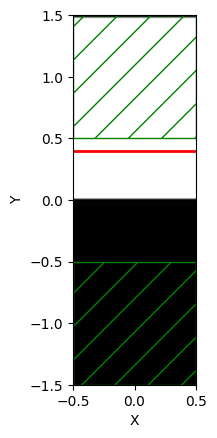

In [65]:
sim.plot2D()

-----------
Initializing structure...
time for choose_chunkdivision = 9.10759e-05 s
Working in 2D dimensions.
Computational cell is 1 x 3 x 0 with resolution 50
     block, center = (0,-0.75,0)
          size (1e+20,1.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)
time for set_epsilon = 0.016633 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.34202,0.939693,0) = 1 after 12 iters
MPB solved for frequency_1(0.34202,4.13223,0) = 4.14636 after 1 iters
MPB solved for frequency_1(0.34202,3.98537,0) = 4.00002 after 1 iters
MPB solved for frequency_1(0.34202,3.98535,0) = 4 after 1 iters
     block, center = (0,-0.75,0)
          size (1e+20,1.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)
Meep progress: 2.72/5.0 = 54.4% done in 4.0s, 3.4s to go
on time step 272 (time=2.72), 0.0147338 s/step
run 0 finished at t = 5.0 (500 timesteps)


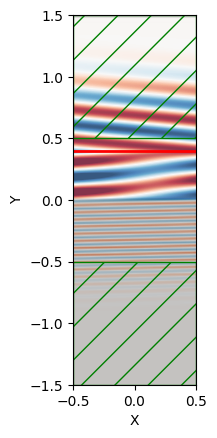

In [66]:
animate = mp.Animate2D(sim, fields=pol)
sim.run(mp.at_every(0.4/10,animate),until=5)

In [67]:
filename = "square-cavity1.mp4"
fps = 10
animate.to_mp4(fps,filename)
Video(filename)

Generating MP4...


Critical angle: $\sin\theta_c=\frac{n_2}{n_1}$